In [63]:
import pandas as pd
import numpy as np

import scipy.stats as st
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
dating_data= pd.read_csv("dating_data.csv")
dating_data.value_counts('group')

group
1    9722
0    4792
dtype: int64

In [25]:
dating_data.query('group == 0').agg({'user_id_1' : 'count', 'user_id_2' : 'count'})

user_id_1    4792
user_id_2    4792
dtype: int64

In [26]:
dating_data.query('group == 1').agg({'user_id_1' : 'count', 'user_id_2' : 'count'})

user_id_1    9722
user_id_2    9722
dtype: int64

In [27]:
dating_data.groupby('group').agg({'user_id_1' : 'nunique', 'user_id_2' : 'nunique'})

,user_id_1,user_id_2
group,,
0,501,501
1,499,499


---
### H0: Соотношение мэтчэй и не мэтчэй в новой и старой версии различаются

In [28]:
pg.chi2_independence(dating_data, x = 'group', y = 'is_match')

(is_match            0            1
 group                             
 0         3193.015847  1598.984153
 1         6477.984153  3244.015847,
 is_match       0       1
 group                   
 0         3857.5   934.5
 1         5813.5  3908.5,
                  test    lambda        chi2  dof           pval    cramer  \
 0             pearson  1.000000  618.688914  1.0  1.441830e-136  0.206463   
 1        cressie-read  0.666667  628.560791  1.0  1.027630e-138  0.208104   
 2      log-likelihood  0.000000  652.966812  1.0  5.056969e-144  0.212106   
 3       freeman-tukey -0.500000  675.931262  1.0  5.125545e-149  0.215803   
 4  mod-log-likelihood -1.000000  703.556093  1.0  5.039774e-155  0.220169   
 5              neyman -2.000000  775.869247  1.0  9.519662e-171  0.231207   
 
    power  
 0    1.0  
 1    1.0  
 2    1.0  
 3    1.0  
 4    1.0  
 5    1.0  )

Отвергаем нулевую гипотезу. pvalue < 0.05 Статистически значимо соотношение различается  
Количество мэтчэй в новой версии больше

---
### H0: Количество мэтчэй на каждого пользователя в новой и старой версиях одинаков

In [60]:
matches = dating_data.query('is_match == 1')\
.groupby(['group', 'user_id_1'])\
.agg({'is_match' : 'count'})

matches

is_match
group user_id_1          
0     4                 2
      10                3
      12                1
      15                3
      17                1
...                   ...
1     987               8
      992               8
      993               6
      998              10
      1000             12

[920 rows x 1 columns]

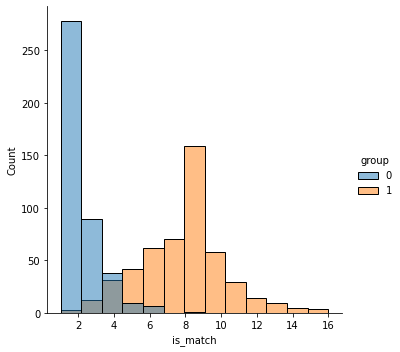

In [35]:
sns.displot(matches, x = 'is_match', hue = 'group')

In [36]:
pg.ttest(x = matches.query('group == 1')['is_match'], y = matches.query('group == 0')['is_match'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,45.232978,744.211281,two-sided,9.229585e-216,"[5.39, 5.88]",2.843535,3.166e+231,1.0


Отвергаем нулевую гипотезу. pvalue < 0.05 Статистически значимо количество мэтчэй различаются  
Количество выводимых мэтчэй на каждого пользователя в новой версии больше примерно на 5

---
### H0: Количество выводимых анкет на каждого пользователя в новой и старой версиях одинаково

In [57]:
forms = dating_data.groupby(['group', 'user_id_1'])\
.count()\
.rename(columns = {'is_match': 'counts'})

forms

user_id_2  counts
group user_id_1                   
0     4                  9       9
      10                 6       6
      12                12      12
      14                 8       8
      15                20      20
...                    ...     ...
1     987               23      23
      992               21      21
      993               18      18
      998               18      18
      1000              23      23

[1000 rows x 2 columns]

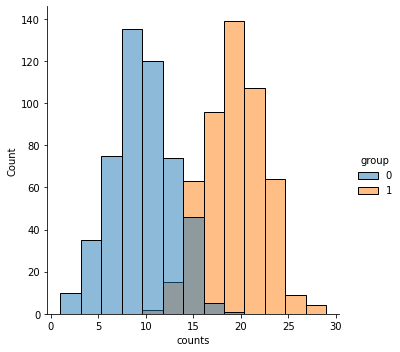

In [58]:
sns.displot(forms, x = 'counts', hue = 'group')

In [65]:
pg.ttest(x = forms.query('group == 1')['counts'], y = forms.query('group == 0')['counts'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,51.85607,997.694538,two-sided,2.005369e-285,"[9.54, 10.29]",3.279531,9.827e+280,1.0


Отвергаем нулевую гипотезу. pvalue < 0.05 Статистически значимо различаются  
Количество выводимых анкет пользователя в новой версии больше примерно на 10

### Вывод:  Определенно стоит включить новую систему поиска анкет на всех пользователей